In [1]:
# Import librerias utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud




In [2]:
df_eda = pd.read_csv('Datasets/df_final_eda.csv')

df_final_eda = pd.DataFrame(df_eda)

In [3]:
df_final_eda.head()

,Unnamed: 0,user_id_x,Item_id,Item_name,Hours_Played,genres,app_name,release_year,id,user_id_y,Recommend,Year_Posted,sentiment_analysis
0,0,76561198035860222,65930,The Bureau: XCOM Declassified,0.00,Action,The Bureau: XCOM Declassified,2013,65930,longinus,False,2014,0
1,1,76561198035860222,65930,The Bureau: XCOM Declassified,0.00,Action,The Bureau: XCOM Declassified,2013,65930,manuel_vega182002,True,2015,2
2,2,GGargula,65930,The Bureau: XCOM Declassified,13.57,Action,The Bureau: XCOM Declassified,2013,65930,longinus,False,2014,0
3,3,GGargula,65930,The Bureau: XCOM Declassified,13.57,Action,The Bureau: XCOM Declassified,2013,65930,manuel_vega182002,True,2015,2
4,4,76561198085547365,65930,The Bureau: XCOM Declassified,0.00,Action,The Bureau: XCOM Declassified,2013,65930,longinus,False,2014,0


In [4]:
# Elimino columna 'Unnamed' no es necesaria
df_final_eda = df_final_eda.drop('Unnamed: 0', axis=1)

In [29]:
df_final_eda.head()

,user_id_x,Item_id,Item_name,Hours_Played,genres,app_name,release_year,id,user_id_y,Recommend,Year_Posted,sentiment_analysis
0,76561198035860222,65930,The Bureau: XCOM Declassified,0.00,Action,The Bureau: XCOM Declassified,2013,65930,longinus,False,2014,0
1,76561198035860222,65930,The Bureau: XCOM Declassified,0.00,Action,The Bureau: XCOM Declassified,2013,65930,manuel_vega182002,True,2015,2
2,GGargula,65930,The Bureau: XCOM Declassified,13.57,Action,The Bureau: XCOM Declassified,2013,65930,longinus,False,2014,0
3,GGargula,65930,The Bureau: XCOM Declassified,13.57,Action,The Bureau: XCOM Declassified,2013,65930,manuel_vega182002,True,2015,2
4,76561198085547365,65930,The Bureau: XCOM Declassified,0.00,Action,The Bureau: XCOM Declassified,2013,65930,longinus,False,2014,0


In [5]:
# Para obtener las dimensiones del dataframe (número de filas, número de columnas)
df_final_eda.shape

(14939582, 12)

In [6]:
# Para obtener información sobre los tipos de datos y los valores no nulos
print(df_final_eda.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14939582 entries, 0 to 14939581
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id_x           object 
 1   Item_id             int64  
 2   Item_name           object 
 3   Hours_Played        float64
 4   genres              object 
 5   app_name            object 
 6   release_year        int64  
 7   id                  int64  
 8   user_id_y           object 
 9   Recommend           bool   
 10  Year_Posted         int64  
 11  sentiment_analysis  int64  
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 1.2+ GB
None


In [7]:
# Para obtener el número de valores únicos en cada columna
print(df_final_eda.nunique())


user_id_x             46630
Item_id                1599
Item_name              1599
Hours_Played          11021
genres                   20
app_name               1599
release_year             26
id                     1599
user_id_y              3485
Recommend                 2
Year_Posted               6
sentiment_analysis        3
dtype: int64


In [8]:
# Para obtener el número total de valores faltantes en cada columna
print(df_final_eda.isnull().sum())

user_id_x             0
Item_id               0
Item_name             0
Hours_Played          0
genres                0
app_name              0
release_year          0
id                    0
user_id_y             0
Recommend             0
Year_Posted           0
sentiment_analysis    0
dtype: int64


In [9]:
print(df_final_eda.describe())

            Item_id  Hours_Played  release_year            id   Year_Posted  \
count  1.493958e+07  1.493958e+07  1.493958e+07  1.493958e+07  1.493958e+07   
mean   1.667455e+05  7.176018e+01  2.012436e+03  1.667455e+05  2.014144e+03   
std    1.240266e+05  2.205757e+02  3.441063e+00  1.240266e+05  8.252282e-01   
min    1.000000e+01  0.000000e+00  1.990000e+03  1.000000e+01  2.010000e+03   
25%    4.000000e+03  1.130000e+00  2.011000e+03  4.000000e+03  2.014000e+03   
50%    2.147700e+05  8.670000e+00  2.013000e+03  2.147700e+05  2.014000e+03   
75%    2.659300e+05  4.220000e+01  2.015000e+03  2.659300e+05  2.015000e+03   
max    5.065900e+05  8.358300e+03  2.017000e+03  5.065900e+05  2.015000e+03   

       sentiment_analysis  
count        1.493958e+07  
mean         1.673350e+00  
std          7.175514e-01  
min          0.000000e+00  
25%          2.000000e+00  
50%          2.000000e+00  
75%          2.000000e+00  
max          2.000000e+00  


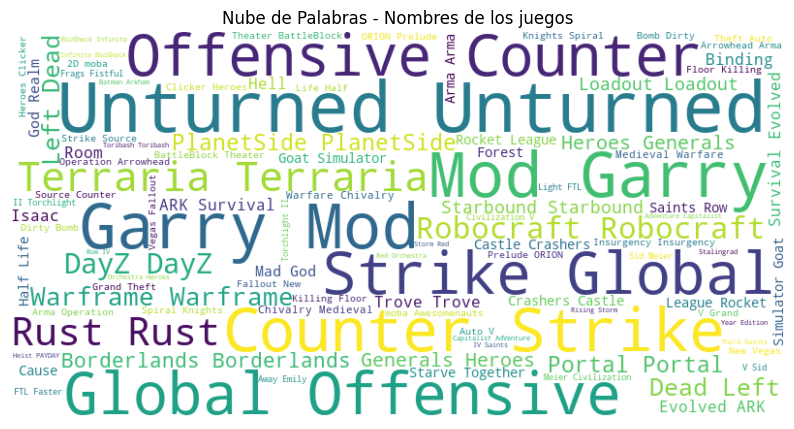

In [28]:
# Obtengo una lista de todos los nombres de los juegos
titulos = df_final_eda['app_name'].fillna('').tolist()

# Concateno todos los nombres en una sola cadena de texto
texto = ' '.join(titulos)

# Creo un objeto WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Nombres de los juegos')
plt.show()

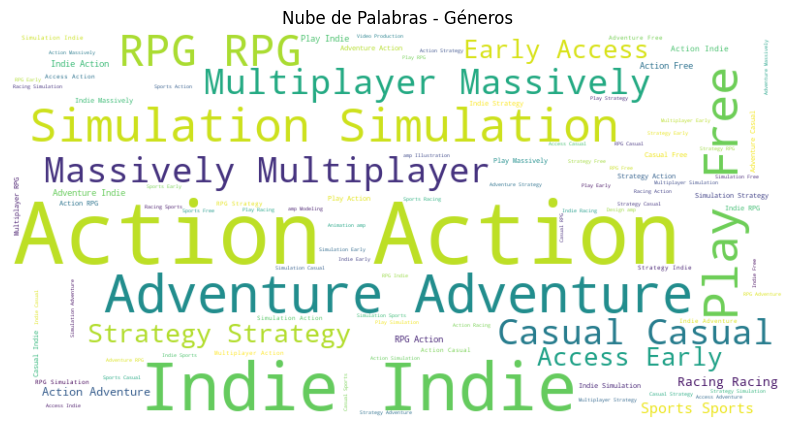

In [27]:
# Obtengo una lista de todos los géneros
generos = df_final_eda['genres'].fillna('').tolist()

# Concateno todos los géneros en una sola cadena de texto
texto = ' '.join(generos)

# Creo un objeto WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Géneros')
plt.show()



Análisis para la columna numérica: Hours_Played
Media: 71.76018397703491
Mediana: 8.67
Moda: 0.0
Desviación estándar: 220.57572642801534


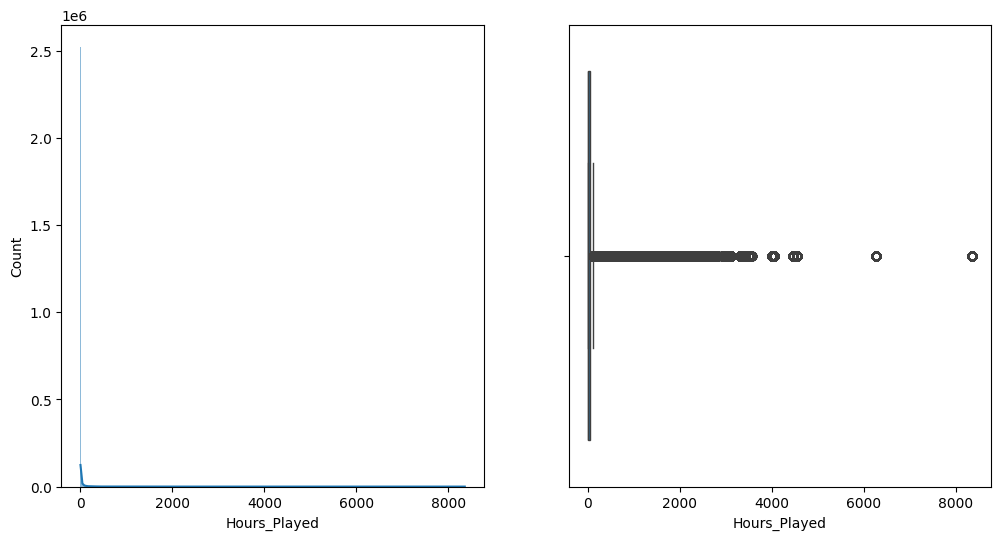


Análisis para la columna numérica: release_year
Media: 2012.4359773921385
Mediana: 2013.0
Moda: 2012
Desviación estándar: 3.4410631108786567


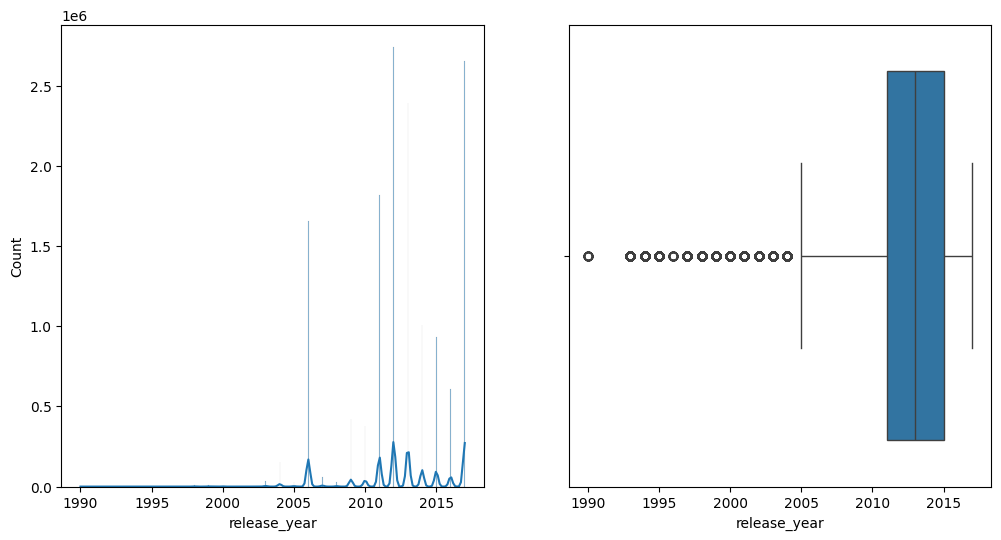


Análisis para la columna numérica: sentiment_analysis
Media: 1.67334976306566
Mediana: 2.0
Moda: 2
Desviación estándar: 0.7175513685095568


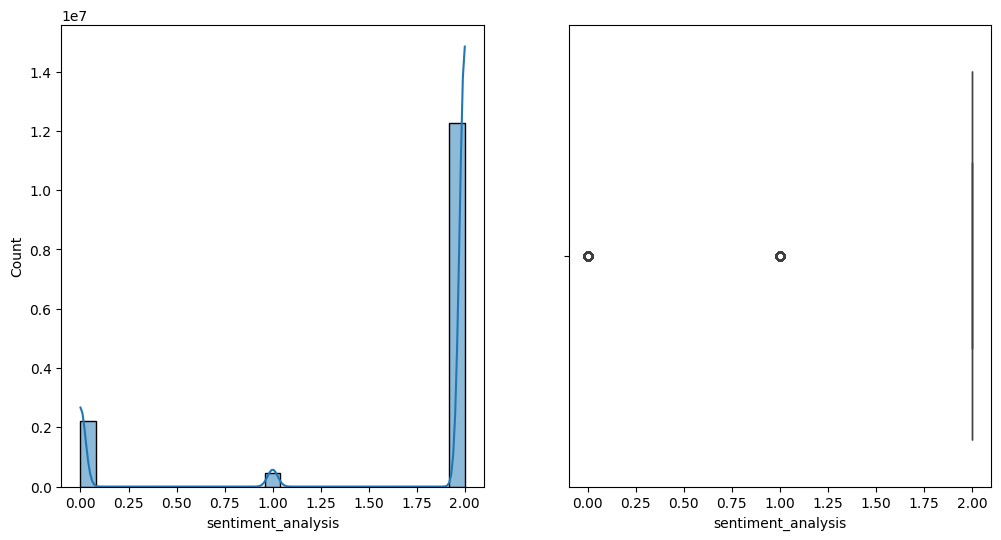

In [13]:
# Lista de columnas numéricas
num_cols = ['Hours_Played', 'release_year', 'sentiment_analysis']

# Para cada columna en la lista de columnas numéricas
for column in num_cols:
    print(f"\nAnálisis para la columna numérica: {column}")
    
    # Imprimir la media, mediana, moda y desviación estándar
    print("Media:", df_final_eda[column].mean())
    print("Mediana:", df_final_eda[column].median())
    print("Moda:", df_final_eda[column].mode().values[0])
    print("Desviación estándar:", df_final_eda[column].std())
    
    # Crear un histograma y un diagrama de caja para visualizar la distribución y los valores atípicos
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_final_eda[column], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_final_eda[column])
    plt.show()



Análisis para la columna categórica: genres
Moda: Action
Frecuencia de cada valor único:
 genres
Action                       5013628
Indie                        2810161
Adventure                    1579374
Free to Play                 1258795
Simulation                   1192686
RPG                          1071575
Massively Multiplayer         640649
Casual                        633235
Strategy                      345504
Early Access                  296835
Sports                         53608
Racing                         41634
Animation &amp; Modeling         473
Design &amp; Illustration        457
Video Production                 378
Web Publishing                   212
Utilities                        212
Education                        105
Software Training                 55
Audio Production                   6
Name: count, dtype: int64


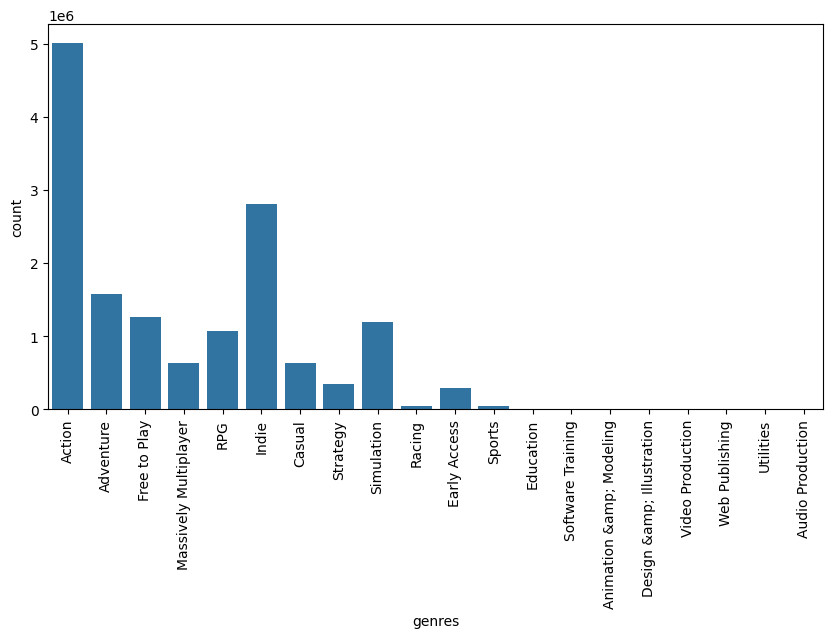

In [14]:
# Lista de columnas categóricas
cat_cols = ['genres']

# Para cada columna en la lista de columnas categóricas
for column in cat_cols:
    print(f"\nAnálisis para la columna categórica: {column}")
    
    # Imprimir la moda y la frecuencia de cada valor único
    print("Moda:", df_final_eda[column].mode().values[0])
    print("Frecuencia de cada valor único:\n", df_final_eda[column].value_counts())
    
    # Crear un gráfico de barras para visualizar la frecuencia de cada valor único
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_final_eda, x=column)
    plt.xticks(rotation=90)
    plt.show()


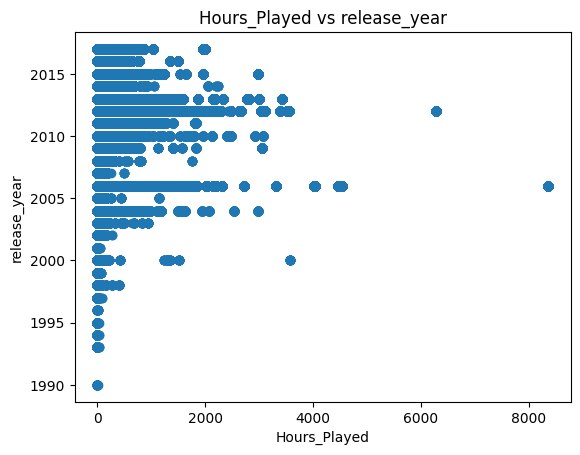

In [19]:
# Realizo un diagrama de dispersión 
fig = plt.figure()                                          
ax = plt.axes()

Hours_Played = df_final_eda['Hours_Played']
release_year = df_final_eda['release_year']
ax.scatter(Hours_Played, release_year)

ax.set(xlabel= 'Hours_Played', ylabel='release_year', title='Hours_Played vs release_year')
plt.show()



In [21]:
# Selecciono las columnas relevantes
variables = df_final_eda[['release_year','sentiment_analysis', 'Recommend','Year_Posted']]

# Calcular la matriz de correlación
correlation_matrix = variables.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)


                    release_year  sentiment_analysis  Recommend  Year_Posted
release_year            1.000000           -0.008440  -0.145108     0.230693
sentiment_analysis     -0.008440            1.000000   0.081208    -0.051413
Recommend              -0.145108            0.081208   1.000000    -0.136303
Year_Posted             0.230693           -0.051413  -0.136303     1.000000


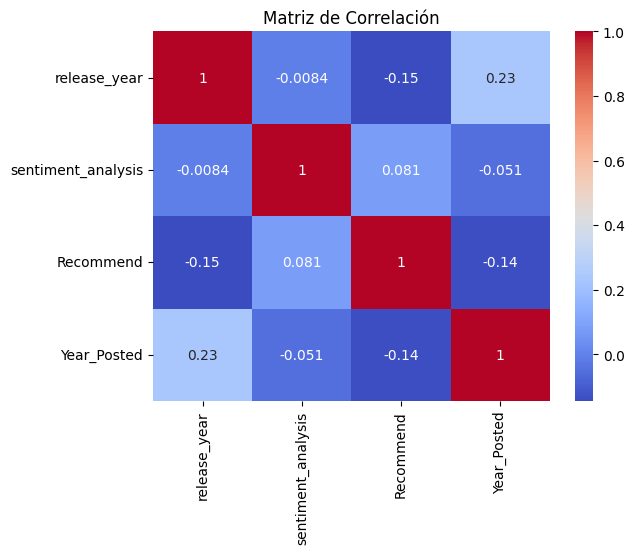

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()